In [1]:
###### load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler, StandardScaler # min/max scaling
import pickle
import seaborn as sns
from matplotlib.colors import LogNorm
from MAPseq_processing import * # import all functions from this script
from MAPseq_plotting import * # import all functions from this script
import matplotlib.lines as mlines # needed for custom legend
from scipy import stats
import random

# import metadata
from M194_M220_metadata import *

# import colormaps
from colormaps import blue_cmp, orange_cmp

%matplotlib inline

# auto refreshes imported functions if source code changes:
%load_ext autoreload
%autoreload 2

In [2]:
# set-up variables
in_path = '/Volumes/Data/Emily/MAPseq/combined_analysis_M194_M220/processed_data/'
out_path = '/Volumes/Data/Emily/figures/fig_2_mapseq/python_out/'

In [3]:
#### load data
with open(in_path +'M194_M220_OMC_bin4.pkl', 'rb') as f:
    omc_bin = pickle.load(f)   

#### load data
with open(in_path +'M194_M220_OMC_countN4.pkl', 'rb') as f:
    omc_countN = pickle.load(f)

#     #### load data
# with open(in_path +'M194_M220_ACA_bin4.pkl', 'rb') as f:
#     aca_bin = pickle.load(f)   

# #### load data
# with open(in_path +'M194_M220_ACA_countN4.pkl', 'rb') as f:
#     aca_countN = pickle.load(f)

# Data Processing

In [4]:
# initial processing
# bin processing
omc_clean = [clean_up_data(df) for df in omc_bin]
omc_type = [sort_by_celltype(df) for df in omc_clean]
omc_preprocess = dfs_preprocess_counts(omc_type) # normalize by dataset median

# countN processing
omc_cleanN = [clean_up_data(df) for df in omc_countN]
omc_typeN = [sort_by_celltype(df) for df in omc_cleanN]
omc_preprocessN = dfs_preprocess_counts(omc_typeN) # normalize by dataset median



# Heatmaps

## individual animal

In [5]:
col_order = ["OMCc", "AUD", "STR", 'TH',  "AMY", 'HY', 'SNr', 'SCm', 'PG', 'PAG',
             'BS', 'OMCi', 'type']


In [8]:
omc_preprocess[10]

,OMCc,AUD,STR,TH,HY,AMY,SNr,SCm,PG,PAG,BS,OMCi,type
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,IT
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,IT
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,IT
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,IT
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,IT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,PT
1045,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,PT
1046,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,PT
1047,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,PT


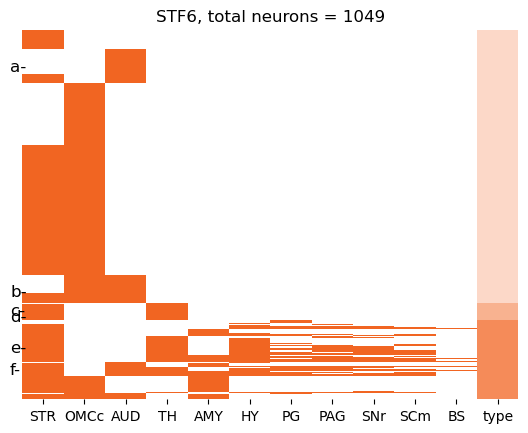

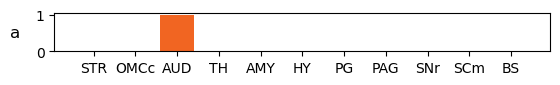

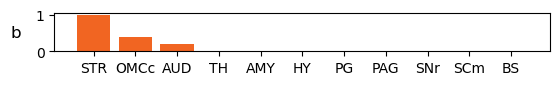

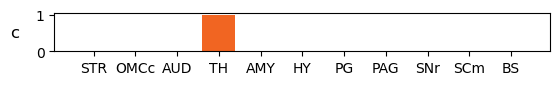

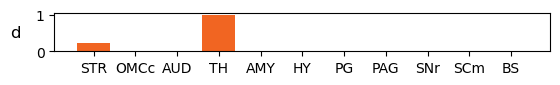

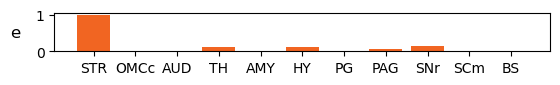

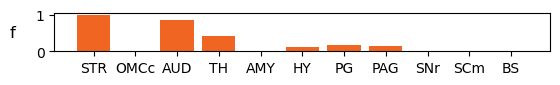

In [56]:
# plot STF6 only, mice[10]
i=10



sort_order = ['type', 'OMCc', 'AUD',  'STR', 'TH', 'AMY', 'HY', 'SNr', 'SCm', 'PG', 'PAG',
       'BS']
neurons = {"a":100, "b":740, "c":795, "d":810, "e":900, "f":960}

title_n = mice[i]+", total neurons = "+str(omc_preprocess[i].shape[0])


# specify column order by highest -> lowest projecting
col_order = omc_preprocess[i].sum().drop('type').sort_values(ascending=False).index.tolist()+["type"]

all_idx, fig = sorted_heatmap(omc_preprocess[i][col_order], sort_by=sort_order, sort_ascend=True, title=title_n, drop=["OMCi"],
               label_neurons=neurons)

plt.savefig(out_path+"OMC_heatmap_mapseq_STF6.jpeg", dpi=300, bbox_inches="tight")
plt.show()

neurons_idx = {}
for key in neurons:
    neurons_idx[key] = all_idx[neurons[key]]

for key in neurons_idx:
       # single_neuron_bar(omc_preprocessN[i], neurons[key], label=key, sort_by=[])
       plot = omc_preprocessN[i][col_order]
       single_neuron_bar(plot, neurons_idx[key], label=key, sort_by=[])
       plt.savefig(out_path+"OMC_heatmap_mapseq_STF6"+"neuron_"+key+".jpeg", dpi=300, bbox_inches="tight")
       plt.show()
       

## MMus

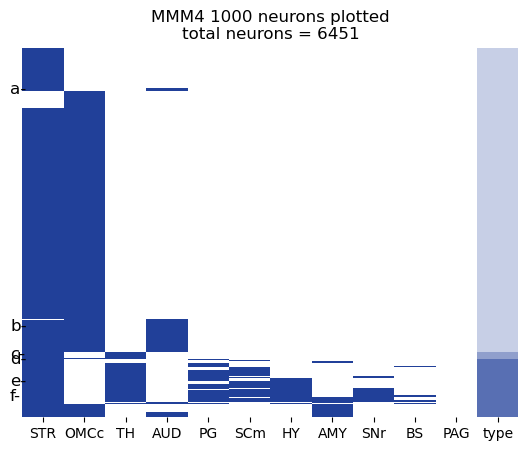

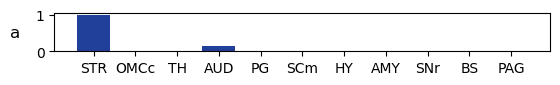

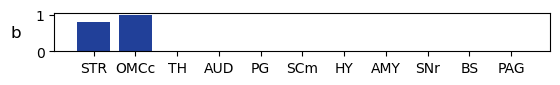

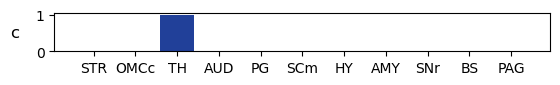

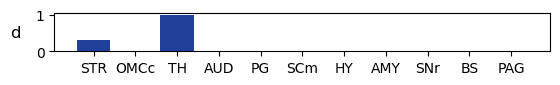

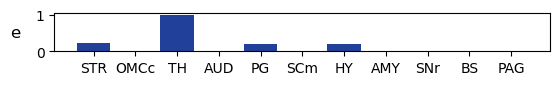

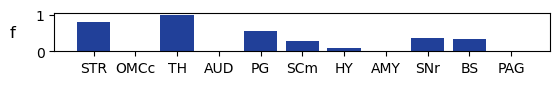

In [55]:
# plot MMM4 only, mice[6]
i=6

sort_order = ['type', 'OMCc', 'AUD',  'STR', 'TH', 'AMY', 'HY', 'SNr', 'SCm', 'PG', 'PAG',
       'BS']
neurons = {"a":110, "b":750, "c":825, "d":840, "e":900, "f":940}

title_n = mice[i]+" 1000 neurons plotted\ntotal neurons = "+str(omc_preprocess[i].shape[0])

# only plot 1000 cells for visualization purposes
n_1000 = omc_preprocess[6].sample(1000, random_state=10)

# specify column order by highest -> lowest projecting
col_order = omc_preprocess[i].sum().drop('type').sort_values(ascending=False).index.tolist()+["type"]


all_idx, fig = sorted_heatmap(n_1000[col_order], sort_by=sort_order, sort_ascend=True, title=title_n, 
                              drop=["OMCi"], cmap=blue_cmp, label_neurons=neurons, col_order=col_order)

plt.savefig(out_path+"OMC_heatmap_mapseq_MMM4.jpeg", dpi=300, bbox_inches="tight")
plt.show()

neurons_idx = {}
for key in neurons:
    neurons_idx[key] = all_idx[neurons[key]]

for key in neurons_idx:
       # single_neuron_bar(omc_preprocessN[i], neurons[key], label=key, sort_by=[])
       plot = omc_preprocessN[i][col_order]
       single_neuron_bar(plot, neurons_idx[key], label=key, sort_by=[], cmap=blue_cmp)
       plt.savefig(out_path+"OMC_heatmap_mapseq_MMM4"+"neuron_"+key+".jpeg", dpi=300, bbox_inches="tight")
       plt.show()
       

## n=1000 species summary

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


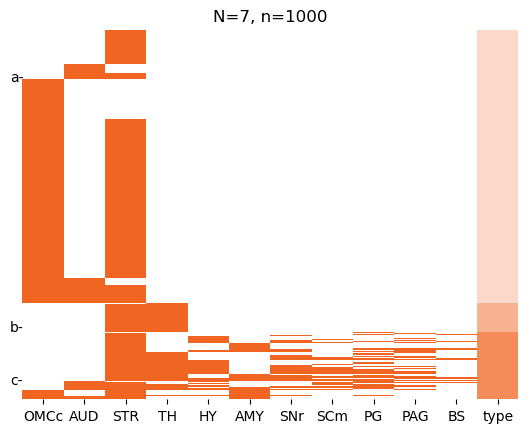

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


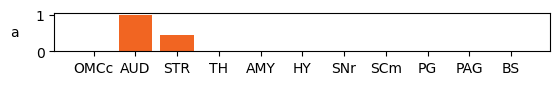

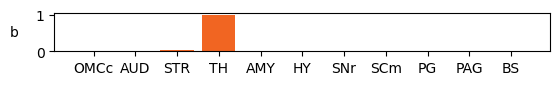

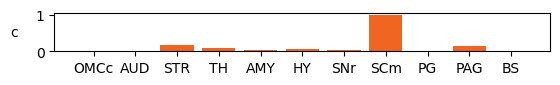

In [125]:
# plot 1000 neurons sampled from all only
stidx = [i for i in range(len(species)) if species[i]=="STeg"]
omc_st = np.take(omc_preprocess, stidx) # just get steg from list
plot_st = pd.concat(omc_st).reset_index(drop=True)


neurons = {"a":124, "b":800, "c":945}

idx, fig = sorted_heatmap(plot_st, sort_by=sort_order, title="N=7, n=1000", drop=["OMCi"],
               nsample=1000, label_neurons=neurons)
plt.savefig(out_path+"OMC_heatmap_ST_1000.jpg", dpi=300, bbox_inches="tight")
plt.show(fig)


stidx = [i for i in range(len(species)) if species[i]=="STeg"]
omcN_st = np.take(omc_preprocessN, stidx) # just get steg from list
plotN_st = pd.concat(omcN_st).reset_index(drop=True)
plotN = plotN_st.loc[idx,:].reset_index(drop=True)
for key in neurons.keys():
       # single_neuron_bar(omc_preprocessN[i], neurons[key], label=key, sort_by=[])
       plot = plotN[col_order]
       single_neuron_plot(plot, neurons[key], label=key, sort_by=[])
       plt.savefig(out_path+"OMC_heatmap_ST_1000_neuron_"+key+".jpg", dpi=300, bbox_inches="tight")
       plt.show()

# Dot Plots

## Add down Sampled lab and singing mouse
- sample from aggregated dataset, with replacement b/w 'animals'

In [57]:
# processing

# IT cells
omc_it = [df[df["type"]=="IT"].drop("type", axis=1) for df in omc_type]
omc_it_prop = dfs_to_proportions(omc_it, cell_type="IT")

mm_it_sim = resample_neurons(omc_it, species="MMus")
mm_it_sim_prop = dfs_to_proportions(mm_it_sim, cell_type="IT")
mm_it_sim_prop['species'] = "MMus_resampled"

st_it_sim = resample_neurons(omc_it, species="STeg")
st_it_sim_prop = dfs_to_proportions(st_it_sim, cell_type="IT")
st_it_sim_prop['species'] = "STeg_resampled"

# PT cells
omc_pt = [df[df["type"]=="PT"].drop("type", axis=1) for df in omc_type]
omc_pt_prop = dfs_to_proportions(omc_pt, cell_type="PT")

mm_pt_sim = resample_neurons(omc_pt, species="MMus")
mm_pt_sim_prop = dfs_to_proportions(mm_pt_sim, cell_type="PT")
mm_pt_sim_prop['species'] = "MMus_resampled"

st_pt_sim = resample_neurons(omc_pt, species="STeg")
st_pt_sim_prop = dfs_to_proportions(st_pt_sim, cell_type="PT")
st_pt_sim_prop['species'] = "STeg_resampled"

plot_it = pd.concat([omc_it_prop, mm_it_sim_prop, st_it_sim_prop])
plot_pt = pd.concat([omc_pt_prop, mm_pt_sim_prop, st_pt_sim_prop])

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:1030: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['xaxis'] = df['species'].replace({"MMus":0, "STeg":1, "MMus_resampled":2, "STeg_resampled":3})
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.098475765062013, 0.0984

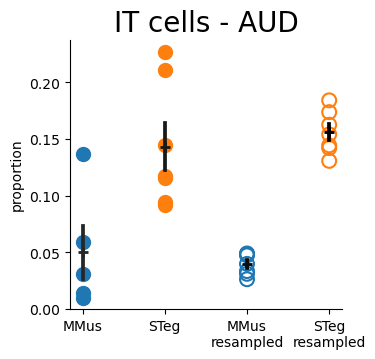

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:1030: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['xaxis'] = df['species'].replace({"MMus":0, "STeg":1, "MMus_resampled":2, "STeg_resampled":3})
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.098475765062013, 0.0984

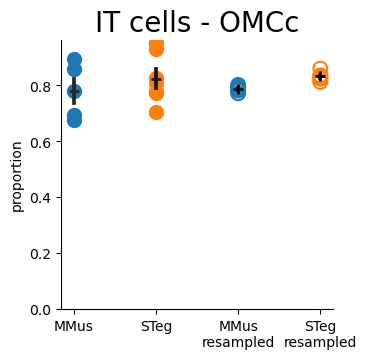

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:1030: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['xaxis'] = df['species'].replace({"MMus":0, "STeg":1, "MMus_resampled":2, "STeg_resampled":3})
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.098475765062013, 0.0984

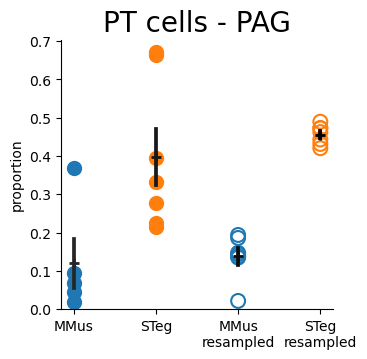

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:1030: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['xaxis'] = df['species'].replace({"MMus":0, "STeg":1, "MMus_resampled":2, "STeg_resampled":3})
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.098475765062013, 0.0984

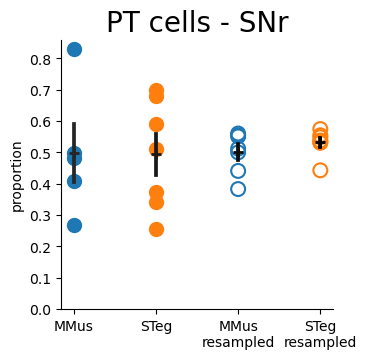

In [76]:
# AUD
dot_plot_resample(plot_it, "AUD", title="IT cells - AUD", add_legend=False)
plt.savefig(out_path+"OMC_AUD_resample_dot.jpg", dpi=300, bbox_inches="tight")
plt.show()

# OMCc
dot_plot_resample(plot_it, "OMCc", title="IT cells - OMCc", add_legend=False)
plt.savefig(out_path+"OMC_OMCc_resample_dot.jpg", dpi=300, bbox_inches="tight")
plt.show()

# PAG
dot_plot_resample(plot_pt, "PAG", title="PT cells - PAG", add_legend=False)
plt.savefig(out_path+"OMC_PAG_resample_dot.jpg", dpi=300, bbox_inches="tight")
plt.show()

# SNr
dot_plot_resample(plot_pt, "SNr", title="PT cells - SNr", add_legend=False)
plt.savefig(out_path+"OMC_SNr_resample_dot.jpg", dpi=300, bbox_inches="tight")
plt.show()

# Intra vs. Inter comparisons

/var/folders/l2/gvq0gkm95b1fbrlls4tsq2wr0000gp/T/ipykernel_50439/2335416046.py:27: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result_means = result.groupby(['label', 'area']).mean().reset_index()


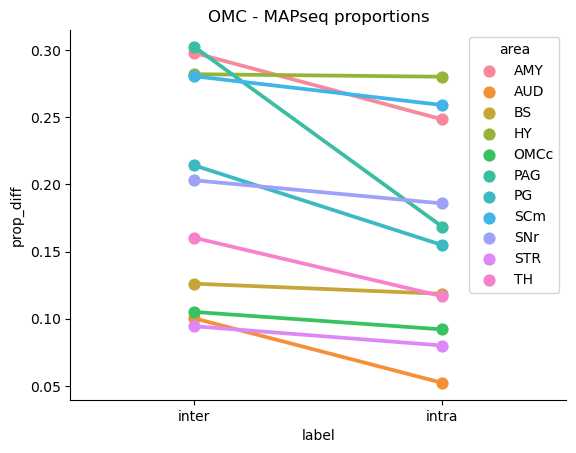

In [132]:
d1 = proportion_comparisons(plot_it, species1="MMus", species2="STeg", label="inter")
d2 = proportion_comparisons(plot_it, species1="MMus", species2="MMus", label="intra")
d3 = proportion_comparisons(plot_it, species1="STeg", species2="STeg", label="intra")

result_it = pd.concat([d1, d2, d3])

inter_it = result_it[result_it['label']=="inter"]
intra_it = result_it[result_it['label']=="intra"]

d4 = proportion_comparisons(plot_pt, species1="MMus", species2="STeg", label="inter")
d5 = proportion_comparisons(plot_pt, species1="MMus", species2="MMus", label="intra")
d6 = proportion_comparisons(plot_pt, species1="STeg", species2="STeg", label="intra")

result_pt = pd.concat([d4, d5, d6])

inter_pt = result_pt[result_pt['label']=="inter"]
intra_pt = result_pt[result_pt['label']=="intra"]

# drop str in result_pt so no repeat areas b/w it and pt
result_pt = result_pt[result_pt['area']!="STR"]

result = pd.concat([result_it, result_pt])

# inter = result[result['label']=="inter"]
# intra = result[result['label']=="intra"]

result_means = result.groupby(['label', 'area']).mean().reset_index()
result_means

fig, ax = plt.subplots()
sns.pointplot(result_means, x="label", y="prop_diff", hue="area")
plt.title("OMC - MAPseq proportions")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig(out_path+"inter_intra_paired_mapseq.jpg", dpi=300, bbox_inches="tight")
plt.show()

In [129]:
from scipy.stats import ttest_rel

# do paired t-test = significant!
result_means_inter = result_means[result_means['label']=="inter"]
result_means_intra = result_means[result_means['label']=="intra"]

ttest_rel(result_means_inter['prop_diff'], result_means_intra['prop_diff'])

Ttest_relResult(statistic=3.29851907409418, pvalue=0.008033567376372364)

# Compare proportions

# Scatterplots

In [149]:
# preprocess
plot_it['type'] = "IT"
plot_pt['type'] = "PT"

(11, 9)
(11, 9)


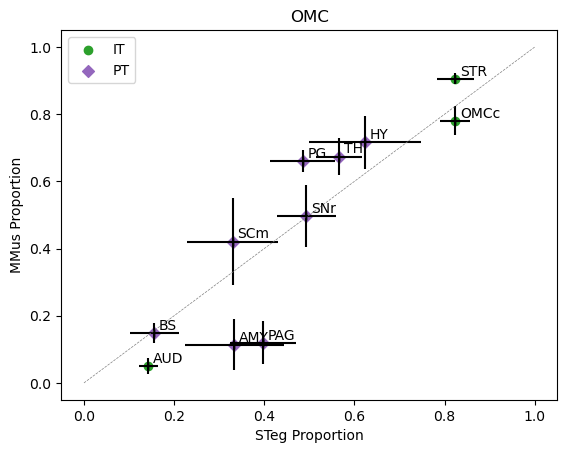

In [155]:
# combine IT and PT
sp_stats_it = stvmm_calc_stats(plot_it, species=["STeg", "MMus"])
sp_stats_pt = stvmm_calc_stats(plot_pt, species=["STeg", "MMus"])

sp_stats = pd.concat([sp_stats_it,sp_stats_pt])

stvmm_area_scatter_type(sp_stats, title="OMC")
plt.savefig(out_path+"OMC_scatter_mapseq_type.jpg", dpi=300, bbox_inches="tight")
plt.show()

## volcano plot

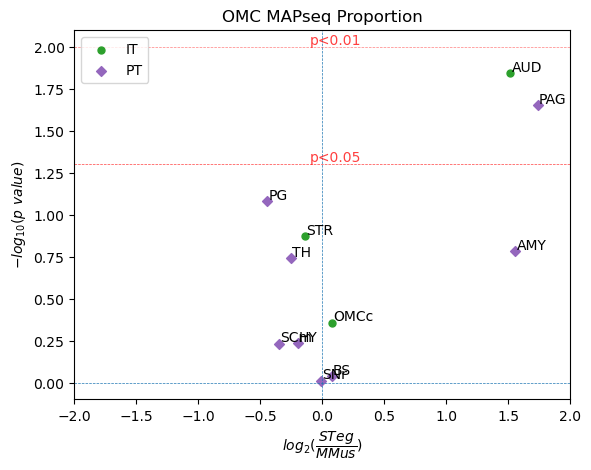

In [156]:
omc_prop = pd.concat([plot_it, plot_pt])
plot = stvmm_calc_ttest(omc_prop, sp1="MMus", sp2="STeg")

plot_volcano(plot, title="OMC MAPseq Proportion", shape="type")
plt.xlim(-2,2)


plt.savefig(out_path+"OMC_volcano_mapseq_type.jpg", dpi=300, bbox_inches="tight")


In [159]:
plot_it

,area,proportion,mice,species,dataset,type
0,OMCc,0.676602,MMM1,MMus,M194,IT
1,AUD,0.014118,MMM1,MMus,M194,IT
2,STR,0.863159,MMM1,MMus,M194,IT
0,OMCc,0.692644,MMF2,MMus,M194,IT
1,AUD,0.059234,MMF2,MMus,M194,IT
...,...,...,...,...,...,...
1,AUD,0.144330,STF3,STeg_resampled,M194,IT
2,STR,0.811856,STF3,STeg_resampled,M194,IT
0,OMCc,0.812144,MMM4,STeg_resampled,M220,IT
1,AUD,0.184061,MMM4,STeg_resampled,M220,IT


(11, 9)
(11, 9)


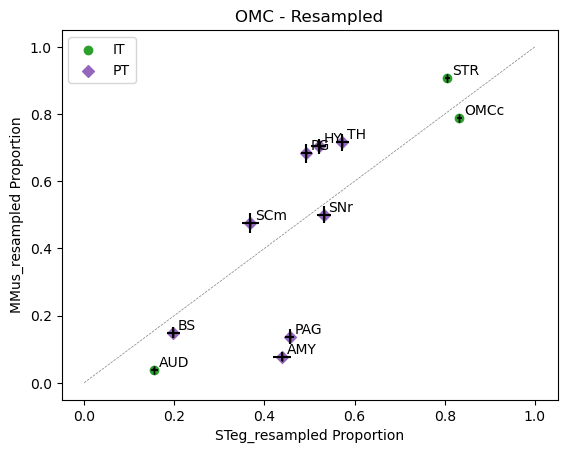

(-3.0, 3.0)

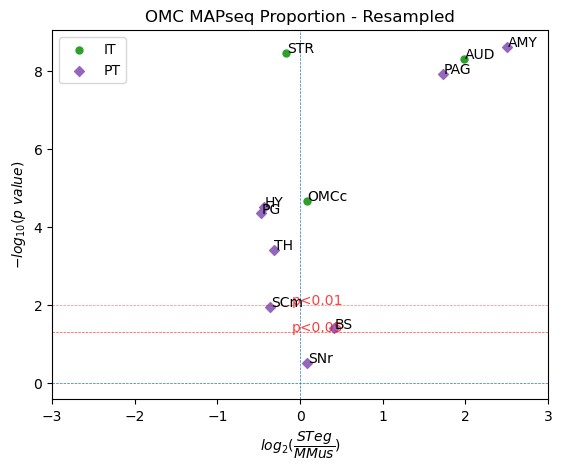

In [165]:
# scatter and volcano plot for comparing resampled data
# combine IT and PT
sp_stats_it = stvmm_calc_stats(plot_it, species=["STeg_resampled", "MMus_resampled"])
sp_stats_pt = stvmm_calc_stats(plot_pt, species=["STeg_resampled", "MMus_resampled"])

sp_stats = pd.concat([sp_stats_it,sp_stats_pt])
sp_stats


stvmm_area_scatter_type(sp_stats, title="OMC - Resampled", x="STeg_resampled", y="MMus_resampled")
# plt.savefig(out_path+"OMC_scatter_mapseq_resampled.jpg", dpi=300, bbox_inches="tight")
plt.show()
## volcano plot
omc_prop = pd.concat([plot_it, plot_pt])
plot = stvmm_calc_ttest(omc_prop, sp1="MMus_resampled", sp2="STeg_resampled")

plot_volcano(plot, title="OMC MAPseq Proportion - Resampled", shape="type")
plt.xlim(-3,3)


# plt.savefig(out_path+"OMC_volcano_mapseq_resampled.jpg", dpi=300, bbox_inches="tight")


# compare number of cells

In [166]:
omc_preprocess[0]

# make dataframe w/ # unique barcodes per animal

nBC_df = pd.DataFrame(columns=["Total Neurons", "IT Neurons", "CT Neurons", "PT Neurons",
                               "mice", "species", "dataset"])

for i in range(metadata.shape[0]):
    df = omc_preprocess[i]
    tot = df.shape[0]
    it = df[df['type']=="IT"].shape[0]
    ct = df[df['type']=="CT"].shape[0]
    pt = df[df['type']=="PT"].shape[0]

    row = [tot, it, ct, pt, metadata.loc[i,"mice"], metadata.loc[i,"species"], metadata.loc[i,"dataset"]]

    nBC_df.loc[i] = row

nBC_df

,Total Neurons,IT Neurons,CT Neurons,PT Neurons,mice,species,dataset
0,11735,8287,2135,1313,MMM1,MMus,M194
1,20562,13050,5314,2198,MMF2,MMus,M194
2,13851,11521,720,1610,MMF3,MMus,M194
3,669,535,41,93,STM1,STeg,M194
4,494,443,4,47,STM2,STeg,M194
5,386,306,10,70,STF3,STeg,M194
6,6451,5201,79,1171,MMM4,MMus,M220
7,18995,15256,772,2967,MMF5,MMus,M220
8,977,675,91,211,STF4,STeg,M220
9,511,380,12,119,STM5,STeg,M220


/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


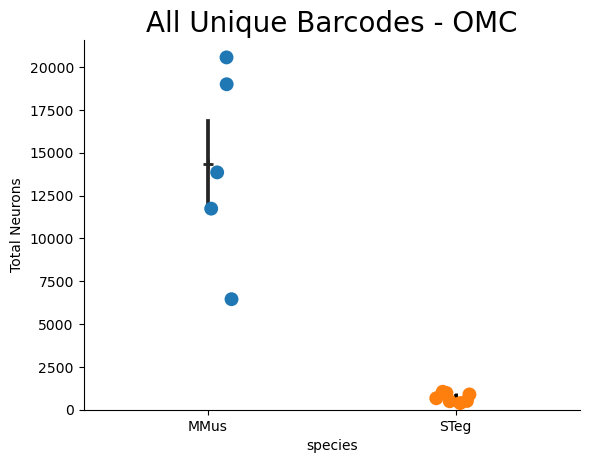

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


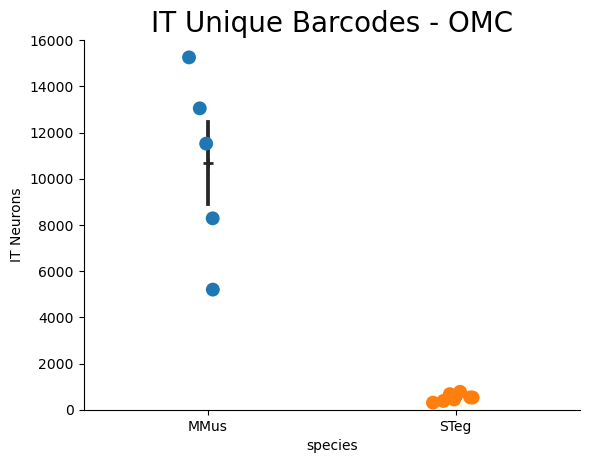

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


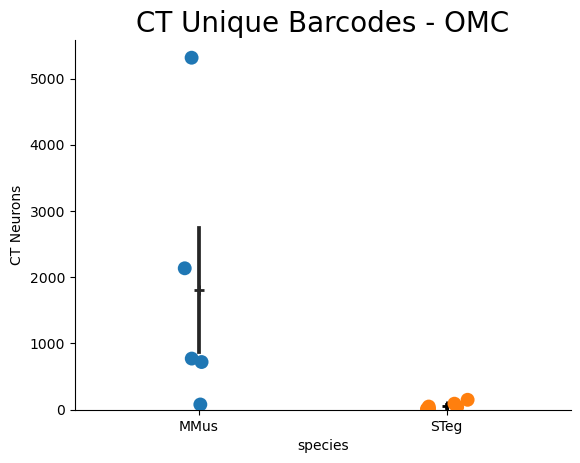

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


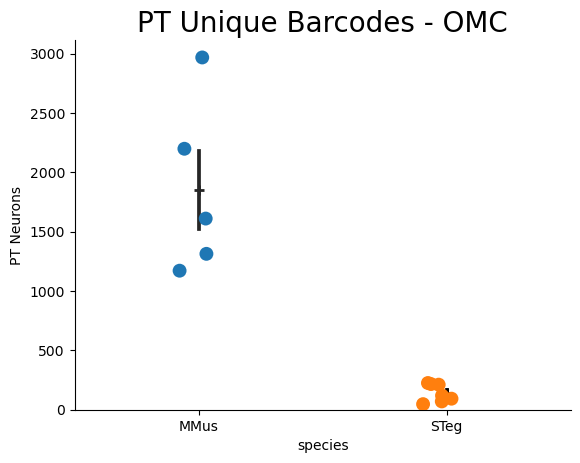

In [167]:
area_proportion_dot_plot(nBC_df, title="All Unique Barcodes - OMC",
                         to_plot="Total Neurons", add_legend=False)
plt.savefig(out_path+"uBC_OMC_all.jpg", dpi=300, bbox_inches="tight")
plt.show()

area_proportion_dot_plot(nBC_df, title="IT Unique Barcodes - OMC",
                         to_plot="IT Neurons", add_legend=False)
plt.show()

area_proportion_dot_plot(nBC_df, title="CT Unique Barcodes - OMC",
                         to_plot="CT Neurons", add_legend=False)
plt.show()

area_proportion_dot_plot(nBC_df, title="PT Unique Barcodes - OMC",
                         to_plot="PT Neurons", add_legend=False)
plt.show()

